In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def loadDataSet(fileName, delim='\t'):
    # 导入数据集 并使用制表符分割样本属性
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return np.mat(datArr)

In [3]:
def PCA(dataMat, topNFeat=1e6):
    # topNFeat为返回属性的特征数量，若不指定则返回前1e6个
    # 计算平均值
    meanVals = np.mean(dataMat, axis=0)
    # 属性减掉均值
    meanRemoved = dataMat - meanVals
    # 计算协方差矩阵及特征值
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    # 将属性特征值从小到大排序
    eigValInd = np.argsort(eigVals)
    # 除去不需要的特征属性
    eigValInd = eigValInd[:-(topNFeat + 1):-1]
    # 将特征值逆序排列
    redEigVects = eigVects[:, eigValInd]
    # 将特征属性映射到新的空间中
    lowDDataMat = meanRemoved * redEigVects
    # 加回均值
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [4]:
def replaceNaNWithMean():
    # 将缺失数据替换为均值
    datMat = loadDataSet('./data/secom.data', ' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        # 找到除确实数据外的其他数据 计算均值
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:, i].A))[0], i])
        # 修正NaN为均值
        datMat[np.nonzero(np.isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat

In [5]:
dataMat = loadDataSet('./data/testSet.txt')
lowDData, reconMat = PCA(dataMat, 1)
print(dataMat.shape, lowDData.shape)

(1000, 2) (1000, 1)


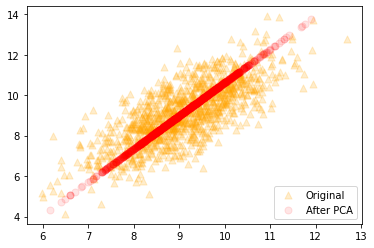

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
sc1 = ax.scatter(dataMat[:, 0].squeeze().A[0], dataMat[:, 1].squeeze().A[0],
           marker='^', s=50, c='orange', alpha=0.2)
sc2 = ax.scatter(reconMat[:, 0].squeeze().A[0], reconMat[:, 1].squeeze().A[0],
           marker='o', s=50, c='red', alpha=0.1)
plt.legend([sc1, sc2], ['Original', 'After PCA'], loc='lower right', scatterpoints=1)
plt.show()

In [7]:
secomData = replaceNaNWithMean()
print(secomData)
meanVals = np.mean(secomData, axis=0)
# 属性减掉均值
meanRemoved = secomData - meanVals
# 计算协方差矩阵及特征值
covMat = np.cov(meanRemoved, rowvar=0)
eigVals, eigVects = np.linalg.eig(np.mat(covMat))
print(eigVals)

[[3.03093000e+03 2.56400000e+03 2.18773330e+03 ... 1.64749042e-02
  5.28333333e-03 9.96700663e+01]
 [3.09578000e+03 2.46514000e+03 2.23042220e+03 ... 2.01000000e-02
  6.00000000e-03 2.08204500e+02]
 [2.93261000e+03 2.55994000e+03 2.18641110e+03 ... 4.84000000e-02
  1.48000000e-02 8.28602000e+01]
 ...
 [2.97881000e+03 2.37978000e+03 2.20630000e+03 ... 8.60000000e-03
  2.50000000e-03 4.35231000e+01]
 [2.89492000e+03 2.53201000e+03 2.17703330e+03 ... 2.45000000e-02
  7.50000000e-03 9.34941000e+01]
 [2.94492000e+03 2.45076000e+03 2.19544440e+03 ... 1.62000000e-02
  4.50000000e-03 1.37784400e+02]]
[ 5.34151979e+07  2.17466719e+07  8.24837662e+06  2.07388086e+06
  1.31540439e+06  4.67693557e+05  2.90863555e+05  2.83668601e+05
  2.37155830e+05  2.08513836e+05  1.96098849e+05  1.86856549e+05
  1.52422354e+05  1.13215032e+05  1.08493848e+05  1.02849533e+05
  1.00166164e+05  8.33473762e+04  8.15850591e+04  7.76560524e+04
  6.66060410e+04  6.52620058e+04  5.96776503e+04  5.16269933e+04
  5.033245